# Board Game Review Predictor

In [1]:
import sys
import numpy 
import pandas 
import matplotlib
import seaborn
import sklearn

print('Python: {}'.format(sys.version))
print('numpy: {}'.format(numpy.__version__))
print('pandas: {}'.format(pandas.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
numpy: 1.16.2
pandas: 0.24.2
matplotlib: 3.0.3
seaborn: 0.9.0
sklearn: 0.20.3


In [2]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the data

game_data = pd.read_csv('games.csv')

In [11]:
game_data.head(5)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [7]:
print(game_data.shape)

(81312, 20)


## Basic Data Info
The dataset consists of 81312 rows and 12 columns.

There are various details of the data game has been provided in this dataset, like the game id, year of publication, minimum number of players required, average rating, average_weights.

In [8]:
#statistical details of data

game_data.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


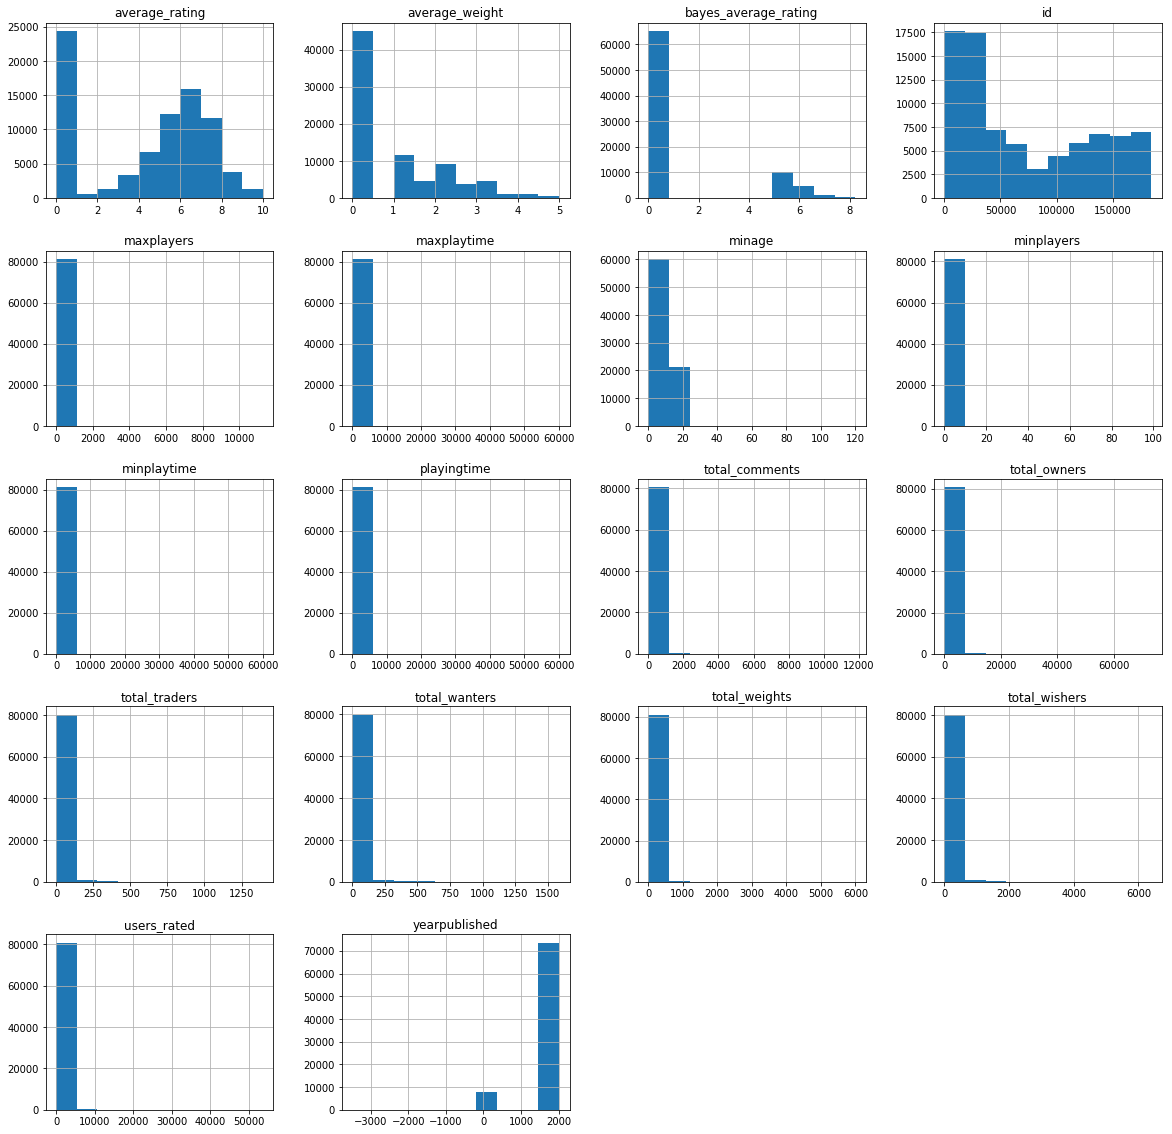

In [13]:
# Plotting Histogram
game_data.hist(figsize=(20,20))
plt.show()

## Observation
From the above histograms of all the columns some of the variables are not relevant to our prediction like 'Id', 'yearpublished' etc, so we wont focus on them.
Our main focus will be on 'average_rating' and 'users_rated'.
So we would like to have a look on these data separately.

### Separate histogram for average_rating and users_rated

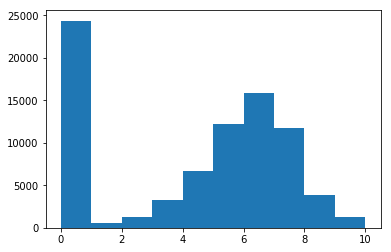

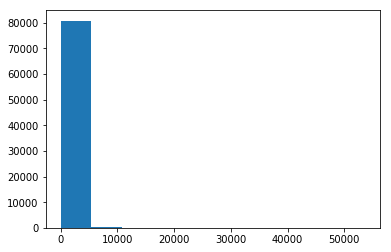

In [21]:
# Histogram for the datas in average_rating column and users_rated column
plt.hist(game_data["average_rating"])
plt.show()
plt.hist(game_data["users_rated"])
plt.show()

### Observation
From the histogram of the above two variables we notice a strange ativity in the given data, that a huge amount of average rating is around zero. As well as there are a lot number zeros in the histogram of users rated.

This clearly implies that there are lots of data available in the given dataset in which none of the users have rated the respective games.
Let's Find out what is going on with those.

In [22]:
# Printing the first row of all the games having zero rarting
print(game_data[game_data['average_rating']==0].iloc[0])

# Printing the first row of all the games having rating above zero
print(game_data[game_data['average_rating']>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          



Form the data above we saw that the games with rating zero has been rated by zero customers, has zero users and even even it's published year is zero which clearly implies here that there are data of some games which was never published. So it will definitely have a zero rating. Large amount of such kind of data can cause serious trouble for our model prediction and can really impact our results in a negative way. So in order to get rid of it, we have to preprocess of data first.

The game Twilight Struggle with average rating above zero has been rated by considerable amount of users. Not all the owners of the game rated the particular game. Here peopele have actually reviewed these.

## Data Preprocessing

In the provided dataset there can be some values which is unavailable/missing to us or may contain some junk values which would effect our model and thus will provide inaccurate predictions. So we have to either process those datas or we have to simply remove that particular row from our dataset.

As we can see a lots of zero ratings are available in the average_rated column of the provided dataset. These zeroes can be from the average rating of the users or it can simply be that none of the users have rated that particular game yet.
Let's find out.

In [23]:
# removing all the rows with zero users rated
game_data = game_data[game_data['users_rated']>0]

# removing rows with missing values

game_data = game_data.dropna(axis=0)

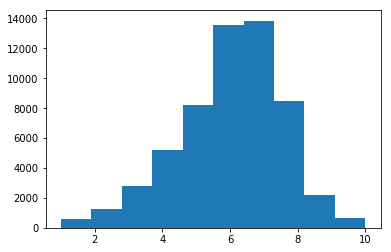

In [24]:
# Average rating histogram for processed data
plt.hist(game_data['average_rating'])
plt.show()

### Observation:
Now here we can see from the above histogram that a huge amount of zero rated data has been removed. As we removed all the datas without any users rating this caused in removal of lots of data with zero average rating. This concludes that, there were lots of data in which no users have rated it ever and that's why it was showing zero average rating value.

In [27]:
print(game_data.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


Here we can see there are some columns which really don't effect the rating of a particular game from real world scenario, for example 'id' of the game which has been arbitrarily assigned to it. The model can find some correlation with the id numbers and it will negatively effect our results. It might consist some biases which can cause overfitting of tha data.  

## Correlation Matrix

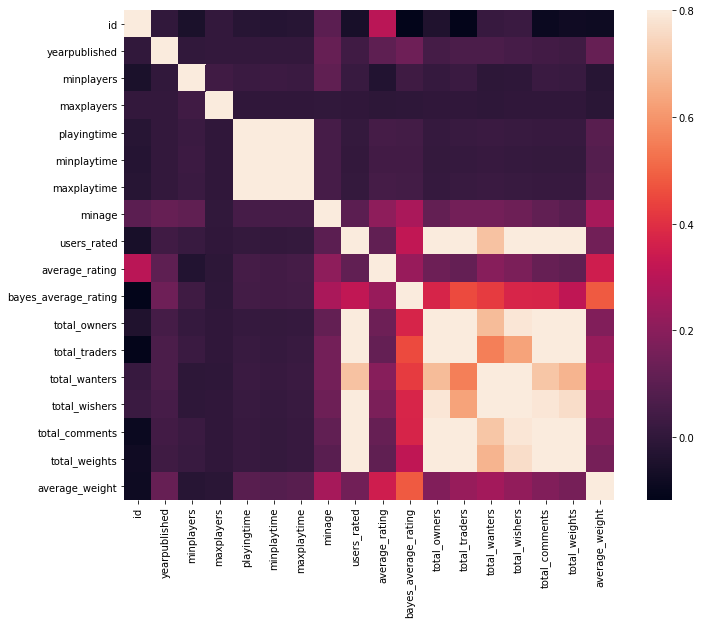

In [31]:
# Correlation matrix
Cor_Mat= game_data.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(Cor_Mat, vmax=0.8, square =True)
plt.show()

### Observation:
Here we can see some of the obvious correlations like in between 'playingtime', minplaytime', 'maxplaytime'. It is not a much useful information for our objective. 

We much interested in the correlation of average_rating with other variables. There from the heatmap we can see 'id' is fairly highly correlated with 'average_rating' which is not desirable and can cause negative impact on our results.
We can see some of the features like 'average_weight', 'min_age', 'bayes_average_rating' are fairly correlated with the 'average_rating'.

Some of the columns should be removed which does not give us any useful information regarding prediction of the average rating.


In [32]:
# getting all the columns to a list;
columns = game_data.columns.tolist()

# filtering out the columns or removing unnecessary columns from our data
columns = [c for c in columns if c not in ['bayes_average_rating', 'average_rating', 'type', 'id', 'name']]

#store the variable we will be predicting on
target = 'average_rating'

### Training an Testing dataset

In [35]:
# generate training and test dataset
from sklearn.model_selection import train_test_split

# Generate the training set
train = game_data.sample(frac=0.8, random_state=1)

# Selecting data not in the training set
test = game_data.loc[~game_data.index.isin(train.index)]

# Print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


# Model Fitting
We will be training two different models with our training dataset, one is linear model and the other is non linear. We will compare the performance of both the models on our testing dataset.
## Linear Model

In [36]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model class
LR = LinearRegression()

#Fit the model training data
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
# Generate prediction for the test dataset
predictions = LR.predict(test[columns])

# Compute error between our prediction and actual values
MSE= mean_squared_error(predictions, test[target])
print(MSE)


2.0788190326293243


The mean squared error of the Linear regression model is found to be 2.07, which is fairly good. Now let's try out with RandomForestRegressor which is a non-linear model and compare the performance of the both the models.

## Non-Linear Model

In [41]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

# Fit the data
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [46]:
# Generaing predictions
predictions = RFR.predict(test[columns])

# Compute the error between predicted and actual data
MSE = mean_squared_error(predictions, test[target])
print(MSE)


1.4458560046071653


Here we got a mean_squared_error of 1.44, which is definitely better than that of the Linear Regression Model.

It has been observed that RandomForestRegressor(non-linear model) performed better than that of the LinearRegression(linear model) in fitting the data.

Lets try to predict with both the models and compare it with the actual results. 

In [52]:
# Testing out with real reuslts
test[columns].iloc[1]

yearpublished      2008.0000
minplayers            1.0000
maxplayers            5.0000
playingtime         200.0000
minplaytime         100.0000
maxplaytime         200.0000
minage               12.0000
users_rated       15774.0000
total_owners      16429.0000
total_traders       205.0000
total_wanters      1343.0000
total_wishers      5149.0000
total_comments     3458.0000
total_weights      1450.0000
average_weight        3.7531
Name: 14, dtype: float64

In [61]:
# Make predictions with both the models
# printing prediction of top 5 rows of dataset
for i in range(0,5):
    rating_LR = LR.predict(test[columns].iloc[i].values.reshape(1,-1))
    rating_RFR = RFR.predict(test[columns].iloc[i].values.reshape(1,-1))
    print('{} {}'.format(rating_LR, rating_RFR))

[8.12061283] [7.91373581]
[9.20860328] [7.85532168]
[8.61000291] [7.8590786]
[7.70283656] [7.72023235]
[9.6461081] [7.92492296]


In [62]:
# Actual value for this data
for i in range(0,5):
    rating_actual = test[target].iloc[i]
    print(rating_actual)

8.07933
7.99115
8.030710000000001
7.87047
7.98786


## Fitted Model Report
It has been observed from the above illustration that in some cases Linear Regression Model have performed better, while in some other cases Random Forest Regressor has performed better. But from the mean squared value it can be clearly concluded that the Random Forest Regressor has performed better than Linear Regression model in most of the values. As we can also see from the above illustraion of top 5 rows of dataset that in most of the cases the Random Forest prediction is near to the actual value.